Data Can be downloaded at https://www.kaggle.com/c/restaurant-revenue-prediction

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading csv file
df=pd.read_csv("train.csv")

In [3]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4453532.613139
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2576071.595708
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1149870.000000
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2999068.000000
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3939804.000000
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5166635.000000
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,19696939.000000


In [4]:
df.shape

(137, 43)

In [5]:
#data frame to X
X=pd.DataFrame()
X=df


In [6]:
X

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227


In [7]:
del X['Id']
del X['Open Date']
del X['City Group']

In [8]:
#below cities are not available in test data set, so replacing them with Othercity
X["City"] = X["City"].str.replace('Amasya','OtherCity')
X["City"] = X["City"].str.replace('Tokat','OtherCity')
X["City"] = X["City"].str.replace('Osmaniye','OtherCity')
X["City"] = X["City"].str.replace('Kastamonu','OtherCity')
X["City"] = X["City"].str.replace('Karabük','OtherCity')
X["City"] = X["City"].str.replace('Elazığ','OtherCity')

In [9]:
Y=pd.DataFrame()
Y['revenue']=X['revenue']

In [10]:
#popping Y
X.pop('revenue')
X.columns

Index([u'City', u'Type', u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7',
       u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14', u'P15', u'P16',
       u'P17', u'P18', u'P19', u'P20', u'P21', u'P22', u'P23', u'P24', u'P25',
       u'P26', u'P27', u'P28', u'P29', u'P30', u'P31', u'P32', u'P33', u'P34',
       u'P35', u'P36', u'P37'],
      dtype='object')

In [11]:
#checking for numerical variables
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4,4,2,2,5,4,5,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4,4,1,2,5,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2,5,2,3,5,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6,6,4,4,10,8,10,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3,4,2,2,5,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [12]:
#Checking for categorical Variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(X)

,City,Type
count,137,137
unique,29,3
top,İstanbul,FC
freq,50,76


In [13]:
X.dtypes

City     object
Type     object
P1        int64
P2      float64
P3      float64
P4      float64
P5        int64
P6        int64
P7        int64
P8        int64
P9        int64
P10       int64
P11       int64
P12       int64
P13     float64
P14       int64
P15       int64
P16       int64
P17       int64
P18       int64
P19       int64
P20       int64
P21       int64
P22       int64
P23       int64
P24       int64
P25       int64
P26     float64
P27     float64
P28     float64
P29     float64
P30       int64
P31       int64
P32       int64
P33       int64
P34       int64
P35       int64
P36       int64
P37       int64
dtype: object

In [14]:
#Creating Dummies for categorical variables
categorical_variables = ['City','Type']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [15]:
X.columns

Index([u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10',
       u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19',
       u'P20', u'P21', u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28',
       u'P29', u'P30', u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37',
       u'City_Adana', u'City_Afyonkarahisar', u'City_Ankara', u'City_Antalya',
       u'City_Aydın', u'City_Balıkesir', u'City_Bolu', u'City_Bursa',
       u'City_Denizli', u'City_Diyarbakır', u'City_Edirne', u'City_Eskişehir',
       u'City_Gaziantep', u'City_Isparta', u'City_Kayseri', u'City_Kocaeli',
       u'City_Konya', u'City_Kütahya', u'City_Kırklareli', u'City_Muğla',
       u'City_OtherCity', u'City_Sakarya', u'City_Samsun', u'City_Tekirdağ',
       u'City_Trabzon', u'City_Uşak', u'City_İstanbul', u'City_İzmir',
       u'City_Şanlıurfa', u'Type_DT', u'Type_FC', u'Type_IL'],
      dtype='object')

In [16]:
X.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,City_Samsun,City_Tekirdağ,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,Type_DT,Type_FC,Type_IL
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,0.036496,0.021898,0.014599,0.007299,0.364964,0.065693,0.007299,0.007299,0.554745,0.437956
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,0.188210,0.146887,0.120379,0.085436,0.483187,0.248655,0.085436,0.085436,0.498818,0.497956
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#using random forest regression
model = RandomForestRegressor(200, oob_score=True, n_jobs=-1, random_state=42)

model.fit(X,Y)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [18]:
#oob score
model.oob_score_


-0.059994082047615693

In [19]:
#Reading test dataset
dfTest=pd.read_csv("test.csv")

In [20]:
dfTest.columns

Index([u'Id', u'Open Date', u'City', u'City Group', u'Type', u'P1', u'P2',
       u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12',
       u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19', u'P20', u'P21',
       u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28', u'P29', u'P30',
       u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37'],
      dtype='object')

In [21]:
test=dfTest.columns

In [22]:
dfTest.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
dtype: object

In [23]:
del dfTest['Id']
del dfTest['Open Date']
del dfTest['City Group']

In [24]:
#the below cities are not found in train data set, so peplacing them with OtherCity
dfTest["City"] = dfTest["City"].str.replace('Aksaray','OtherCity')

In [25]:
dfTest["City"] = dfTest["City"].str.replace('Artvin','OtherCity')

In [26]:
dfTest["City"] = dfTest["City"].str.replace('Batman','OtherCity')

In [27]:
dfTest["City"] = dfTest["City"].str.replace('Bilecik','OtherCity')

In [28]:
dfTest["City"] = dfTest["City"].str.replace('Çanakkale','OtherCity')

In [29]:
dfTest["City"] = dfTest["City"].str.replace('Çankıri','OtherCity')

In [30]:
dfTest["City"] = dfTest["City"].str.replace('Çorum','OtherCity')

In [31]:
dfTest["City"] = dfTest["City"].str.replace('Düzce','OtherCity')

In [32]:
dfTest["City"] = dfTest["City"].str.replace('Erzincan','OtherCity')

In [33]:
dfTest["City"] = dfTest["City"].str.replace('Erzurum','OtherCity')

In [34]:
dfTest["City"] = dfTest["City"].str.replace('Giresun','OtherCity')

In [35]:
dfTest["City"] = dfTest["City"].str.replace('Hatay','OtherCity')

In [36]:
dfTest["City"] = dfTest["City"].str.replace('Kahramanmaraş','OtherCity')

In [37]:
dfTest["City"] = dfTest["City"].str.replace('Kars','OtherCity')

In [38]:
dfTest["City"] = dfTest["City"].str.replace('Kırıkkale','OtherCity')

In [39]:
dfTest["City"] = dfTest["City"].str.replace('Kırşehir','OtherCity')

In [40]:
dfTest["City"] = dfTest["City"].str.replace('Malatya','OtherCity')

In [41]:
dfTest["City"] = dfTest["City"].str.replace('Manisa','OtherCity')

In [42]:
dfTest["City"] = dfTest["City"].str.replace('Mardin','OtherCity')

In [43]:
dfTest["City"] = dfTest["City"].str.replace('Mersin','OtherCity')

In [44]:
dfTest["City"] = dfTest["City"].str.replace('Nevşehir','OtherCity')

In [45]:
dfTest["City"] = dfTest["City"].str.replace('Niğde','OtherCity')

In [46]:
dfTest["City"] = dfTest["City"].str.replace('Ordu','OtherCity')

In [47]:
dfTest["City"] = dfTest["City"].str.replace('Rize','OtherCity')

In [48]:
dfTest["City"] = dfTest["City"].str.replace('Siirt','OtherCity')

In [49]:
dfTest["City"] = dfTest["City"].str.replace('Sivas','OtherCity')

In [50]:
dfTest["City"] = dfTest["City"].str.replace('Tanımsız','OtherCity')

In [51]:
dfTest["City"] = dfTest["City"].str.replace('Tekirdağ','OtherCity')

In [52]:
dfTest["City"] = dfTest["City"].str.replace('Yalova','OtherCity')

In [53]:
dfTest["City"] = dfTest["City"].str.replace('Zonguldak','OtherCity')

In [54]:
#can't find MB in Train data set, so removing it
dfTest = dfTest[dfTest.Type != 'MB']

In [55]:
dfTest.City.value_counts()

İstanbul          34004
OtherCity         17412
Ankara             8700
İzmir              6454
Antalya            5900
Kocaeli            4355
Adana              2510
Balıkesir          2457
Bursa              2436
Muğla              1820
Aydın              1611
Konya              1573
Gaziantep          1483
Edirne             1227
Denizli             961
Diyarbakır          950
Eskişehir           898
Trabzon             658
Bolu                630
Şanlıurfa           608
Sakarya             602
Afyonkarahisar      329
Samsun              324
Kayseri             321
Çankırı             306
Kütahya             304
Isparta             303
Uşak                293
Kırklareli          281
Name: City, dtype: int64

In [56]:
#looking for categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(dfTest)

,City,Type
count,99710,99710
unique,29,3
top,İstanbul,FC
freq,34004,57019


In [57]:
#creating dummies
categorical_variables = ['City', 'Type']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(dfTest[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    dfTest = pd.concat([dfTest, dummies], axis=1)
    dfTest.drop([variable], axis=1, inplace=True)

In [58]:
dfTest.columns

Index([u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10',
       u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19',
       u'P20', u'P21', u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28',
       u'P29', u'P30', u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37',
       u'City_Adana', u'City_Afyonkarahisar', u'City_Ankara', u'City_Antalya',
       u'City_Aydın', u'City_Balıkesir', u'City_Bolu', u'City_Bursa',
       u'City_Denizli', u'City_Diyarbakır', u'City_Edirne', u'City_Eskişehir',
       u'City_Gaziantep', u'City_Isparta', u'City_Kayseri', u'City_Kocaeli',
       u'City_Konya', u'City_Kütahya', u'City_Kırklareli', u'City_Muğla',
       u'City_OtherCity', u'City_Sakarya', u'City_Samsun', u'City_Trabzon',
       u'City_Uşak', u'City_Çankırı', u'City_İstanbul', u'City_İzmir',
       u'City_Şanlıurfa', u'Type_DT', u'Type_FC', u'Type_IL'],
      dtype='object')

In [59]:
X.columns

Index([u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10',
       u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19',
       u'P20', u'P21', u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28',
       u'P29', u'P30', u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37',
       u'City_Adana', u'City_Afyonkarahisar', u'City_Ankara', u'City_Antalya',
       u'City_Aydın', u'City_Balıkesir', u'City_Bolu', u'City_Bursa',
       u'City_Denizli', u'City_Diyarbakır', u'City_Edirne', u'City_Eskişehir',
       u'City_Gaziantep', u'City_Isparta', u'City_Kayseri', u'City_Kocaeli',
       u'City_Konya', u'City_Kütahya', u'City_Kırklareli', u'City_Muğla',
       u'City_OtherCity', u'City_Sakarya', u'City_Samsun', u'City_Tekirdağ',
       u'City_Trabzon', u'City_Uşak', u'City_İstanbul', u'City_İzmir',
       u'City_Şanlıurfa', u'Type_DT', u'Type_FC', u'Type_IL'],
      dtype='object')

In [60]:
Testpred=model.predict(dfTest)

In [61]:
Testpred

array([ 4002326.645 ,  3327339.825 ,  3899531.06  , ...,  4800042.835 ,
        4812884.715 ,  5688200.5525])

In [62]:
#Result before grid search
Testp=pd.DataFrame()
Testp['y']=Testpred
Testp.to_csv("sub1_new.csv")

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


30 trees
C-stat:  -0.107299539783

50 trees
C-stat:  -0.0943963343192

100

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 trees
C-stat:  -0.0771816300331

200 trees
C-stat:  -0.0887733217461

500

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 trees
C-stat:  -0.07846993158

1000 trees
C-stat:  -0.0669059534085

2000 trees
C-stat:  -0.0681464164276



C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


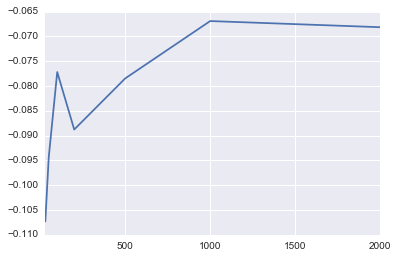

In [63]:
#grid search
#Checking trees
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=47)
    model.fit(X, Y)
    print trees, "trees"
    roc = model.oob_score_
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


auto option
C-stat:  -0.0669059534085

None option
C-stat:  -0.0669059534085

sqrt

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 option
C-stat:  0.00163810206182

log2 option
C-stat:  -0.0115515055338

0.9

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 option
C-stat:  -0.0631018768502

0.2 option
C-stat:  -0.0121116214304



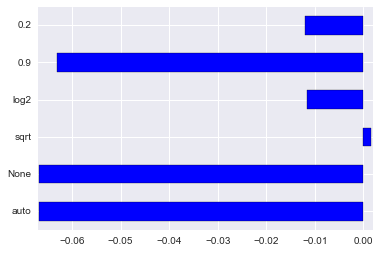

In [64]:
#checking features
results2 = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=47, max_features=max_features)
    model.fit(X, Y)
    print max_features, "option"
    roc = model.oob_score_
    print "C-stat: ", roc
    results2.append(roc)
    print ""
    
pd.Series(results2, max_features_options).plot(kind="barh", xlim=(-.067,.002));

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 min samples
C-stat:  -0.0669059534085

2 min samples
C-stat:  0.0684569992285

3

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.0967690431305

4 min samples
C-stat:  0.10864385318

5

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.11944461414

6 min samples
C-stat:  0.126786324244

7

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.121960178673

8 min samples
C-stat:  0.117629697682

9

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.110240953533

10 min samples
C-stat:  0.0987850145598



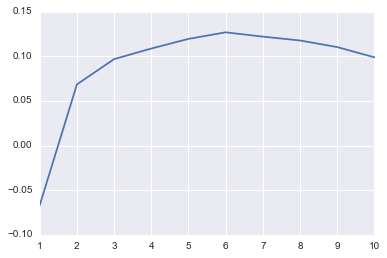

In [65]:
#checking leafs
results3 = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=47, max_features="auto",  min_samples_leaf=min_samples)
    model.fit(X, Y)
    print min_samples, "min samples"
    roc = model.oob_score_
    print "C-stat: ", roc
    results3.append(roc)
    print ""
    
pd.Series(results3, min_samples_leaf_options).plot();

In [ ]:
#Got best results at 1000 trees, features sqrt, leafs 6
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features= sqrt,  min_samples_leaf=6)
model.fit(X, Y)

In [ ]:
Testpred1=model.predict(dfTest)

In [ ]:
#Printing final output to CSV
Testp1=pd.DataFrame()
Testp1['y']=Testpred1
Testp1.to_csv("sub2_new.csv")